In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization,
                                     Activation, Dropout, Flatten, Dense)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# ----------------------------
# 1. Model Architecture: ScriptNet
# ----------------------------
def build_scriptnet(input_shape=(32, 32, 1), num_classes=83):
    inputs = Input(shape=input_shape, name='input_layer')

    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax', name='output_layer')(x)

    model = Model(inputs=inputs, outputs=outputs, name='ScriptNet')
    return model

2025-05-27 19:49:04.848621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748375345.055388      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748375345.113611      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# ----------------------------
# 2. Data Loading: BanglaLekha-Isolated
# ----------------------------
# Replace this with your full Google Drive path if needed
dataset_path = "/kaggle/input/bangla-lekha-isolated-dataset/BanglaLekha-Isolated/Images/"

input_shape = (32, 32, 1)
batch_size = 64
epochs = 30
num_classes = 84  # Update if using fewer classes

# Preprocessing: rescale + grayscale
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    subset='validation',
    shuffle=False
)

Found 132914 images belonging to 84 classes.
Found 33191 images belonging to 84 classes.


In [4]:
# ----------------------------
# 3. Compile Model
# ----------------------------
model = build_scriptnet(input_shape=input_shape, num_classes=num_classes)
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

I0000 00:00:1748375584.442817      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748375584.443469      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "ScriptNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,514,260 (9.59 MB)

 Trainable params: 2,512,340 (9.58 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [5]:
# ----------------------------
# 4. Callbacks
# ----------------------------
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ModelCheckpoint("scriptnet_banglalekha_best.h5", monitor="val_accuracy", save_best_only=True)
]



# ----------------------------
# 5. Train Model
# ----------------------------
steps_per_epoch = np.ceil(train_generator.samples / batch_size).astype(int)
validation_steps = np.ceil(val_generator.samples / batch_size).astype(int)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1748375643.988092     128 service.cc:148] XLA service 0x7a881c005e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748375643.989106     128 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748375643.989126     128 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748375644.515886     128 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/2077 ━━━━━━━━━━━━━━━━━━━━ 6:15:24 11s/step - accuracy: 0.0312 - loss: 5.3764

I0000 00:00:1748375650.151622     128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2077/2077 ━━━━━━━━━━━━━━━━━━━━ 950s 453ms/step - accuracy: 0.5125 - loss: 1.9198 - val_accuracy: 0.8943 - val_loss: 0.3662 - learning_rate: 0.0010
Epoch 2/30
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 193s 93ms/step - accuracy: 0.7984 - loss: 0.7161 - val_accuracy: 0.9299 - val_loss: 0.2488 - learning_rate: 0.0010
Epoch 3/30
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 145s 70ms/step - accuracy: 0.8371 - loss: 0.5711 - val_accuracy: 0.9397 - val_loss: 0.2147 - learning_rate: 0.0010
Epoch 4/30
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 147s 71ms/step - accuracy: 0.8573 - loss: 0.4966 - val_accuracy: 0.9429 - val_loss: 0.2046 - learning_rate: 0.0010
Epoch 5/30
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 151s 73ms/step - accuracy: 0.8696 - loss: 0.4522 - val_accuracy: 0.9457 - val_loss: 0.1915 - learning_rate: 0.0010
Epoch 6/30
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 165s 80ms/step - accuracy: 0.8802 - loss: 0.4133 - val_accuracy: 0.9499 - val_loss: 0.1740 - learning_rate: 0.0010
Epoch 7/30
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 147s 71ms/step - accuracy:

In [8]:
# ----------------------------
# 6. Train Model for some more epoch
# ----------------------------

history2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    initial_epoch=30,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 31/40
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 141s 68ms/step - accuracy: 0.9479 - loss: 0.1621 - val_accuracy: 0.9633 - val_loss: 0.1463 - learning_rate: 1.2500e-04
Epoch 32/40
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 144s 69ms/step - accuracy: 0.9501 - loss: 0.1556 - val_accuracy: 0.9630 - val_loss: 0.1455 - learning_rate: 1.2500e-04
Epoch 33/40
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 143s 69ms/step - accuracy: 0.9503 - loss: 0.1536 - val_accuracy: 0.9630 - val_loss: 0.1467 - learning_rate: 1.2500e-04
Epoch 34/40
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 146s 70ms/step - accuracy: 0.9524 - loss: 0.1458 - val_accuracy: 0.9631 - val_loss: 0.1464 - learning_rate: 1.2500e-04
Epoch 35/40
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 153s 73ms/step - accuracy: 0.9538 - loss: 0.1429 - val_accuracy: 0.9631 - val_loss: 0.1478 - learning_rate: 1.2500e-04
Epoch 36/40
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9540 - loss: 0.1406
Epoch 36: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
2077/2077 ━━━━━━━━━━━━━━

In [9]:
# ----------------------------
# 7. Train Model for some more epoch
# ----------------------------

history3 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    initial_epoch=40,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 41/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 145s 70ms/step - accuracy: 0.9566 - loss: 0.1344 - val_accuracy: 0.9638 - val_loss: 0.1467 - learning_rate: 3.1250e-05
Epoch 42/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 140s 68ms/step - accuracy: 0.9573 - loss: 0.1327 - val_accuracy: 0.9638 - val_loss: 0.1467 - learning_rate: 3.1250e-05
Epoch 43/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 138s 66ms/step - accuracy: 0.9568 - loss: 0.1303 - val_accuracy: 0.9638 - val_loss: 0.1473 - learning_rate: 3.1250e-05
Epoch 44/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 149s 72ms/step - accuracy: 0.9566 - loss: 0.1311 - val_accuracy: 0.9637 - val_loss: 0.1469 - learning_rate: 3.1250e-05
Epoch 45/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 143s 69ms/step - accuracy: 0.9570 - loss: 0.1305 - val_accuracy: 0.9639 - val_loss: 0.1464 - learning_rate: 3.1250e-05
Epoch 46/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 147s 71ms/step - accuracy: 0.9576 - loss: 0.1290 - val_accuracy: 0.9637 - val_loss: 0.1472 - learning_rate: 3.1250e-05
Epoch 47/50
2077/2077 ━━━━━━

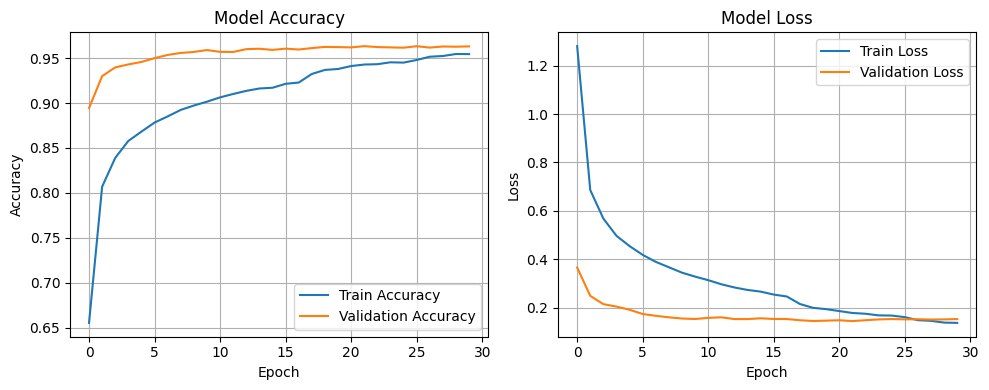

In [10]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

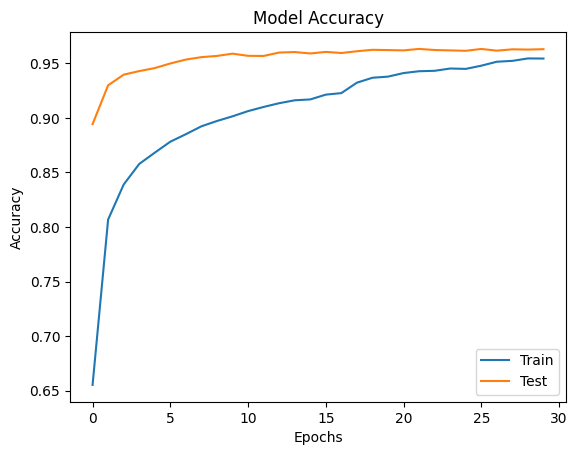

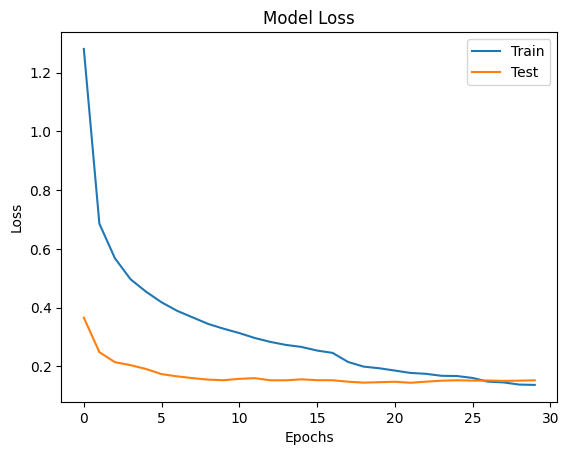

In [11]:
# plot the convergence, in terms of accuracy and loss, of ScriptNet
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [13]:
# Merge history2 into history
for key in history2.history.keys():
    history.history[key].extend(history2.history[key])

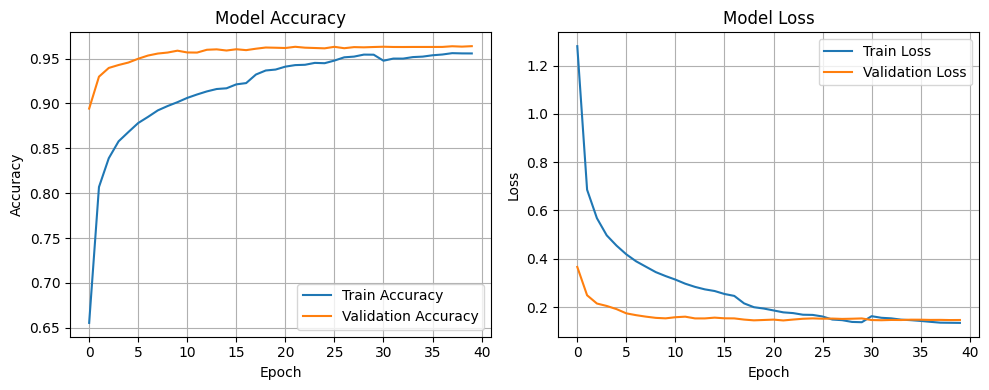

In [14]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

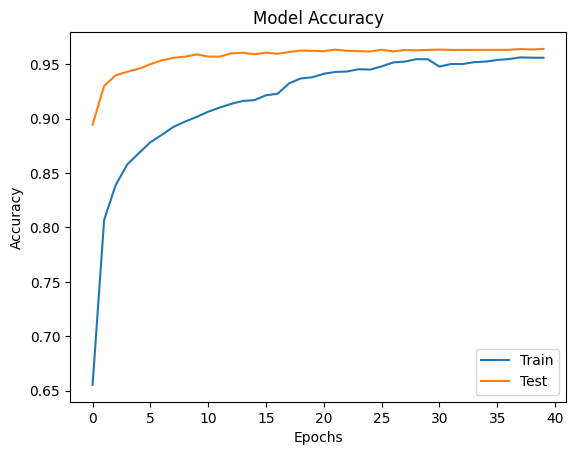

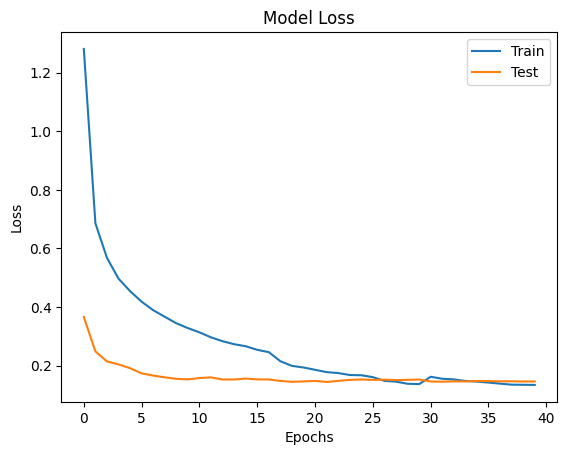

In [15]:
# plot the convergence, in terms of accuracy and loss, of ScriptNet
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [16]:
# Merge history3 into history
for key in history3.history.keys():
    history.history[key].extend(history3.history[key])

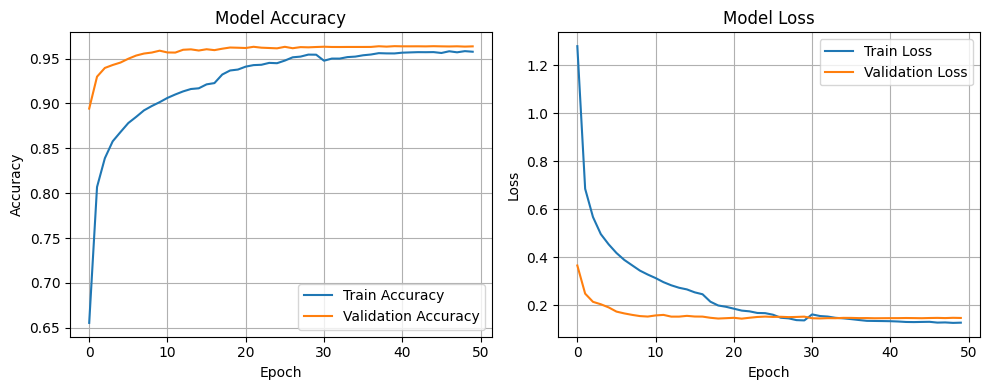

In [17]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

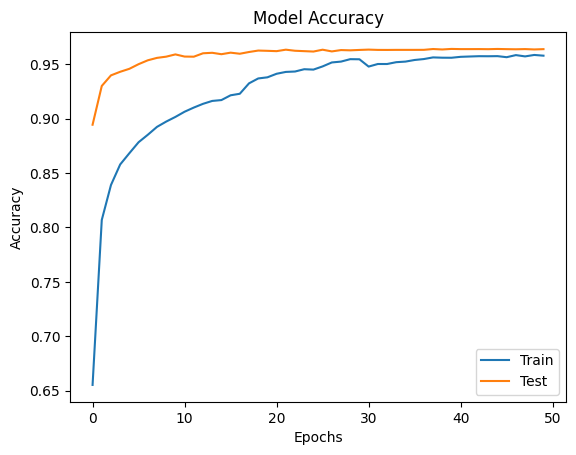

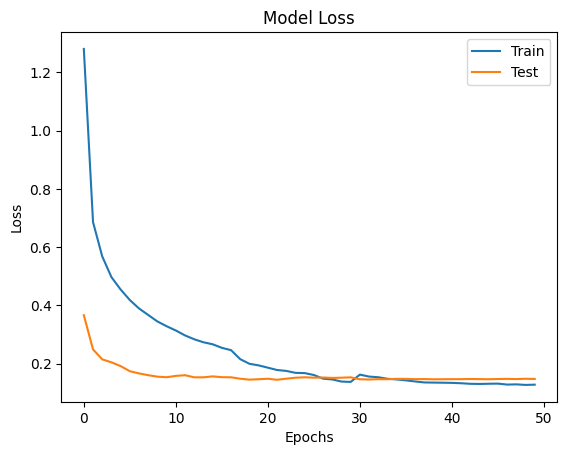

In [18]:
# plot the convergence, in terms of accuracy and loss, of ScriptNet
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

519/519 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step


<Figure size 1200x1200 with 0 Axes>

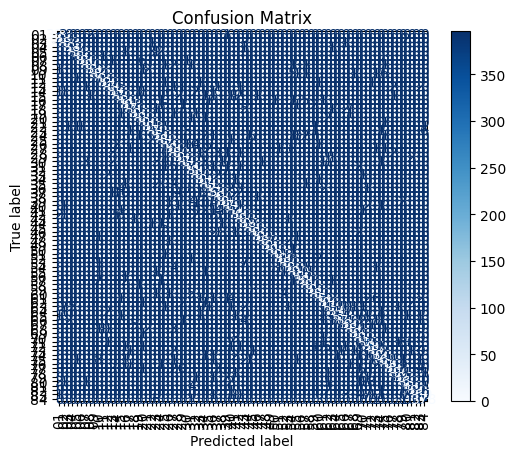

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
plt.figure(figsize=(12, 12))
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

In [20]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Predict and true labels (already obtained previously)
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("📋 Classification Report:\n")
print(report)

# Extract and print macro, weighted scores
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print("🔢 Macro Scores")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-score (Macro):  {f1_macro:.4f}")

print("\n🔢 Weighted Scores")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1-score (Weighted):  {f1_weighted:.4f}")


519/519 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step
📋 Classification Report:

              precision    recall  f1-score   support

          01     0.9701    0.9848    0.9774       395
          02     0.9751    0.9874    0.9812       396
          03     0.9873    0.9823    0.9848       395
          04     0.9800    0.9899    0.9849       396
          05     0.9624    0.9697    0.9660       396
          06     0.9870    0.9596    0.9731       396
          07     0.9872    0.9797    0.9834       394
          08     0.9824    0.9824    0.9824       397
          09     0.9923    0.9747    0.9834       396
          10     0.9525    0.9621    0.9573       396
          11     0.9899    0.9874    0.9886       396
          12     0.9849    0.9899    0.9874       396
          13     0.9711    0.9415    0.9561       393
          14     0.9769    0.9621    0.9695       396
          15     0.9229    0.9392    0.9310       395
          16     0.9797    0.9747    0.9772       396
          17

In [22]:
import pickle

# Save existing training history
with open("scriptnet_history.pkl", "wb") as f:
    pickle.dump(history.history, f)
